In [1]:
easy_sample = (
    "Alice dropped her phone. She picked it up and smiled. "
    "Bob said he would help her later."
)

sample = (
    "Dr. Glenn Tyler (Elvis Presley), a childish 25-year old, gets into a fight with and badly injures his drunken brother. A court releases him on probation into the care of his uncle in a small town, appointing Irene Sperry (Hope Lange) to give him psychological counselling. Marked as a trouble-maker, he is falsely suspected of various misdemeanors including an affair with Irene. Eventually shown to be innocent, he leaves to go to college and become a writer."
)

In [2]:
from preprocess import preprocess
import json

out = preprocess(sample)
print(json.dumps(out["sentences"], indent=2, ensure_ascii=False))
doc = out["doc"]

/home/Spotted/.local/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[
  "Dr. Glenn Tyler (Elvis Presley), a childish 25-year old, gets into a fight with and badly injures his drunken brother.",
  "A court releases him on probation into the care of his uncle in a small town, appointing Irene Sperry (Hope Lange) to give him psychological counselling.",
  "Marked as a trouble-maker, he is falsely suspected of various misdemeanors including an affair with Irene.",
  "Eventually shown to be innocent, he leaves to go to college and become a writer."
]


In [3]:
import spacy
from extraction import detect_entities, detect_events, create_narrative_segment, merge_narrative_segments

    
nlp = spacy.load("en_core_web_sm")
graph = None
segs = []
for sentence in out["sentences"]:
    print(f"- {sentence}")
    doc = nlp(sentence)
    ents = detect_entities(doc)
    evs = detect_events(doc)
    curr_seg_nodes, curr_seg_graph = create_narrative_segment(ents, evs)
    segs.append({"nodes": curr_seg_nodes, "graph": curr_seg_graph})
    print(f"  Entities: {len(ents)}, Events: {len(evs)}")
    print(f"  Entities: {ents}")
    print(f"  Events: {evs}")
    for ev in evs:
        print(f"    - {ev['lemma']} | subj: {ev.get('subject_texts')} | obj: {ev.get('object_texts')}")
    print("--------")

- Dr. Glenn Tyler (Elvis Presley), a childish 25-year old, gets into a fight with and badly injures his drunken brother.
  Entities: 3, Events: 3
  Entities: [{'id': 'b85bdfb3-c03d-42d1-b9e3-e046db22e900', 'text': 'Glenn Tyler', 'label': 'PERSON', 'start': 4, 'end': 15}, {'id': 'a76b90a9-633c-4bd2-921e-edaf8e19972d', 'text': 'Elvis Presley', 'label': 'PERSON', 'start': 17, 'end': 30}, {'id': '0bb4c4e5-b823-4141-9f51-fbcf5b6d15c3', 'text': '25-year old', 'label': 'DATE', 'start': 44, 'end': 55}]
  Events: [{'id': '020754c8-f2d4-4fc8-91da-ffd2ca023464', 'text': 'Dr. Glenn Tyler (Elvis Presley), a childish 25-year old, gets into a fight with and badly injures his drunken brother.', 'lemma': 'get', 'start': 0, 'end': 118, 'subject_texts': ['Tyler'], 'object_texts': [], 'sentence': 'Dr. Glenn Tyler (Elvis Presley), a childish 25-year old, gets into a fight with and badly injures his drunken brother.'}, {'id': '230134e2-716e-48b7-a997-91ec167b0262', 'text': 'a fight with', 'lemma': 'fight', 

In [4]:
for text in ents:
    print("Entity Text:", text["text"])
    print(text["label"])
    print("---")

In [5]:
for text in evs:
    print("Event Text:", text["text"])
    print("Subject Texts:", text["subject_texts"])
    print("Object Texts:", text["object_texts"])
    print("---")

Event Text: Eventually shown to be innocent
Subject Texts: []
Object Texts: []
---
Event Text: Eventually shown to be innocent, he leaves to go to college and become a writer.
Subject Texts: ['he']
Object Texts: []
---
Event Text: to go to college and become a writer
Subject Texts: []
Object Texts: []
---
Event Text: become a writer
Subject Texts: []
Object Texts: []
---


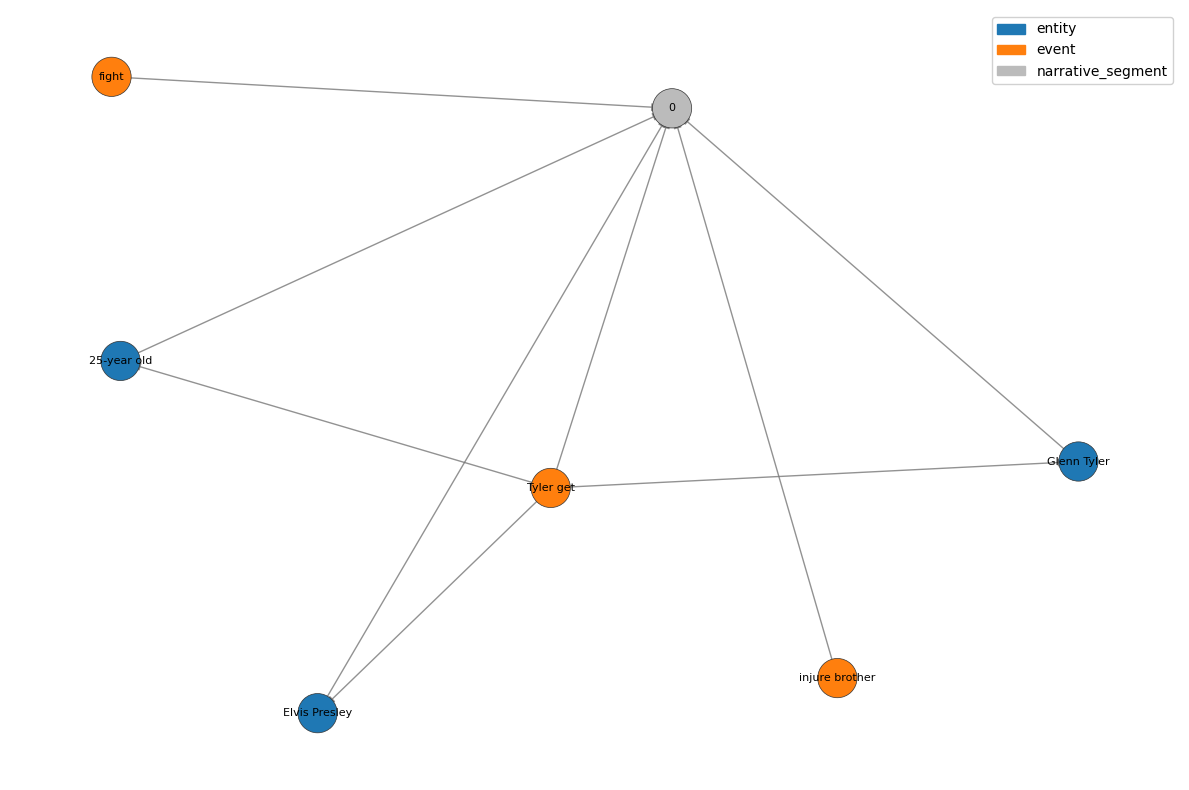

{0: array([0.26316747, 0.62715211]),
 'b85bdfb3-c03d-42d1-b9e3-e046db22e900': array([ 1.        , -0.10127997]),
 'a76b90a9-633c-4bd2-921e-edaf8e19972d': array([-0.37946965, -0.62035359]),
 '0bb4c4e5-b823-4141-9f51-fbcf5b6d15c3': array([-0.73677343,  0.1061574 ]),
 '020754c8-f2d4-4fc8-91da-ffd2ca023464': array([ 0.04322756, -0.15578958]),
 '230134e2-716e-48b7-a997-91ec167b0262': array([-0.75302599,  0.6920994 ]),
 'e7c4d11a-4f9f-407b-9b02-5952df293dc4': array([ 0.56287403, -0.54798577])}

In [6]:
from utils import visualize_graph
curr_nodes, curr_graph = segs[0]["nodes"], segs[0]["graph"]
visualize_graph(curr_graph, nodes=curr_nodes)